Кемерова А.М. ИУ5-61Б

Лабораторная работа №4. Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
HOUSING_PATH = os.path.join('datasets')

def fetch_housing_path(housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)

fetch_housing_path()

In [3]:
def load_data_(data, data_path=HOUSING_PATH):
    csv_path = os.path.join(data_path, data)
    return pd.read_csv(csv_path)

Разделение выборки на обучающую и тестовую

In [4]:
X, Y = make_moons(n_samples=200, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
X.shape, X_train.shape, X_test.shape

((200, 2), (140, 2), (60, 2))

KneighborsClassifier

In [6]:
knc = KNeighborsClassifier(n_jobs=-1)
knc.fit(X_train, Y_train)
target = knc.predict(X_test)
accuracy_score(Y_test, target)

0.9166666666666666

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    target = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, target, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, target, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

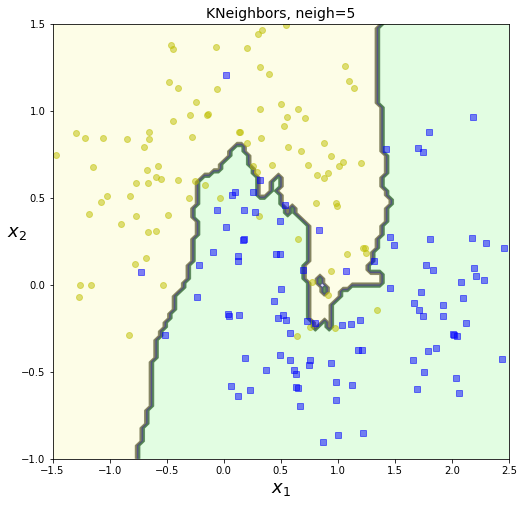

In [8]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plot_decision_boundary(knc, X, Y)
plt.title('KNeighbors, neigh=5', fontsize=14)
plt.show()

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
cvs = cross_val_score(knc, X, Y, cv=kf, scoring='accuracy')
cvs.mean()

0.9099999999999999

Cross validation

In [11]:
max_mean = -1
for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    cvs = cross_val_score(clf, X, Y, cv=kf, scoring='accuracy')
    mean = cvs.mean()
    print(str(i) + ": " + str(mean))
    if mean > max_mean:
        max_mean = mean
        max_n = i
print(max_n, max_mean)

1: 0.865
3: 0.9100000000000001
5: 0.9099999999999999
7: 0.905
9: 0.9
11: 0.9199999999999999
13: 0.925
15: 0.9
17: 0.9099999999999999
19: 0.915
13 0.925


In [12]:
k_best_n = KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
k_best_n.fit(X_train, Y_train)
target = k_best_n.predict(X_test)
accuracy_score(Y_test, target)

0.8833333333333333

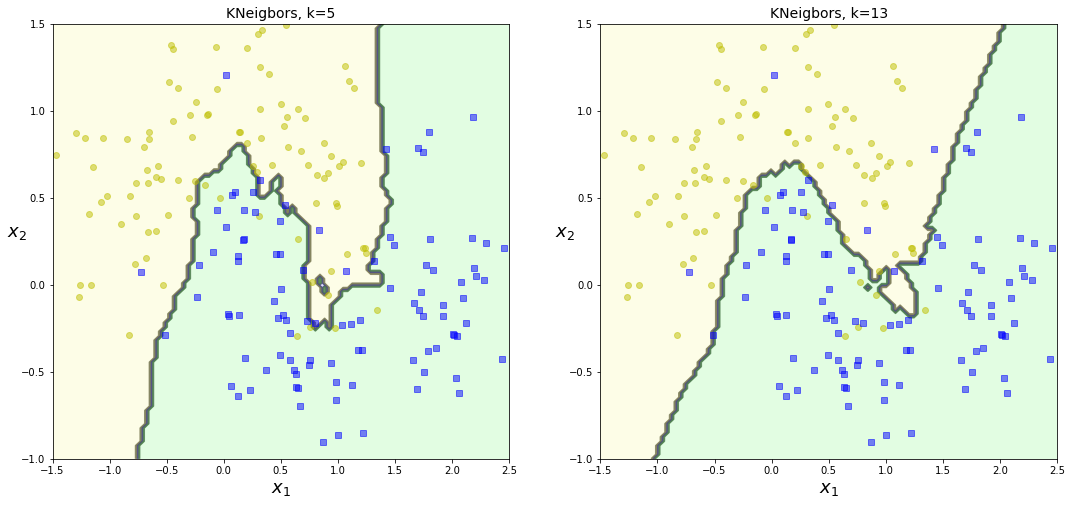

In [13]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plot_decision_boundary(knc, X, Y)
plt.title('KNeigbors, k=5', fontsize=14)
plt.subplot(122)
plot_decision_boundary(k_best_n, X, Y)
plt.title("KNeigbors, k=13", fontsize=14)
plt.show()

GridSearchCV


In [14]:
param_grid = [{'n_neighbors': [3, 5, 7, 9, 11], 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance']}]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf, n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7, 9, 11],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
k_best_new = grid_search.best_estimator_
k_best_new.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [16]:
target = k_best_new.predict(X_test)
accuracy_score(Y_test, target)

0.9333333333333333